In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import fastf1
# 경기 데이터 로드
# 경기년도, 서킷장소 이름, 퀄리파잉 Q or 레이스 : R 
session = fastf1.get_session(2019, 'Monza', 'Q')
# telemetry, laps, weather 정보는 로드하지 않음.
session.load(telemetry=False, laps=False, weather=False)
vettel = session.get_driver('VET')
print(f"Pronto {vettel['FirstName']}?")


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


Pronto Sebastian?


In [18]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1') 

session = fastf1.get_session(2019, 'Monza', 'Q')
# 위와 달리 전부 경기 데이터 전부 로드 
session.load()
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

print("🏎️ Leclerc data")
print(fast_leclerc)
print("🏁"*100)
print("🏎️ Leclerc Car data")
print(lec_car_data)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63

🏎️ Leclerc data
Time                      0 days 01:11:14.868000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:19.307000
LapNumber                                   14.0
Stint                                        5.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:26.469000
Sector2Time               0 days 00:00:26.412000
Sector3Time               0 days 00:00:26.426000
Sector1SessionTime        0 days 01:10:22.030000
Sector2SessionTime        0 days 01:10:48.442000
Sector3SessionTime        0 days 01:11:14.868000
SpeedI1                                    329.0
SpeedI2                                    347.0
SpeedFL                                    321.0
SpeedST                                    349.0
IsPersonalBest                              True
Compound                                    SOFT
Tyre

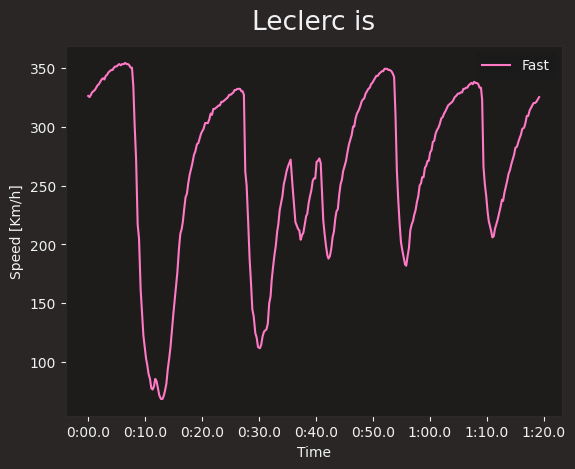

In [19]:
# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [20]:
print(f"🏁 Session name: {session.name}")
print(f"🏁 Session date: {session.date}")
print(f"🏁 Session event: {session.event}")


🏁 Session name: Qualifying
🏁 Session date: 2019-09-07 13:00:00
🏁 Session event: RoundNumber                                                    14
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 GRAN PREMIO HEINEKEN D'ITALIA 2019
EventDate                                     2019-09-08 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2019-09-06 11:00:00+02:00
Session1DateUtc                               2019-09-06 09:00:00
Session2                                               Practice 2
Session2Date                            2019-09-06 15:00:00+02:00
Session2DateUtc                               2019-09-06 13:00:00
Session3                                               Practic

In [21]:
# 이런식으로 로드해서 사용하면 됨. 
print(f"🏁 Session event Name: {session.event['EventName']}")

🏁 Session event Name: Italian Grand Prix


In [23]:
schedule = fastf1.get_event_schedule(2025)
print(f"🏎️ Formular 1 Schedule: {schedule}")

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!


🏎️ Formular 1 Schedule:    RoundNumber    Country   Location  \
0            0    Bahrain     Sakhir   
1            1  Australia  Melbourne   
2            2      China   Shanghai   
3            3      Japan     Suzuka   

                                   OfficialEventName  EventDate  \
0           FORMULA 1 ARAMCO PRE-SEASON TESTING 2025 2025-02-28   
1  FORMULA 1 LOUIS VUITTON AUSTRALIAN GRAND PRIX ... 2025-03-16   
2         FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2025 2025-03-23   
3         FORMULA 1 LENOVO JAPANESE GRAND PRIX 2025  2025-04-06   

               EventName        EventFormat    Session1  \
0     Pre-Season Testing            testing       Day 1   
1  Australian Grand Prix       conventional  Practice 1   
2     Chinese Grand Prix  sprint_qualifying  Practice 1   
3    Japanese Grand Prix       conventional  Practice 1   

                Session1Date     Session1DateUtc  ...    Session3  \
0  2025-02-26 10:00:00+03:00 2025-02-26 07:00:00  ...       Day 3   
1  20

In [25]:
print(f"🏁 Session name: {session.name}")
print(f"🏁 Session date: {session.date}")
print(f"🏎️ Formular 1 Results {session.results}")

🏁 Session name: Qualifying
🏁 Session date: 2019-09-07 13:00:00
🏎️ Formular 1 Results    DriverNumber BroadcastName Abbreviation         DriverId  \
16           16     C LECLERC          LEC          leclerc   
44           44    L HAMILTON          HAM         hamilton   
77           77      V BOTTAS          BOT           bottas   
5             5      S VETTEL          VET           vettel   
3             3   D RICCIARDO          RIC        ricciardo   
27           27  N HULKENBERG          HUL       hulkenberg   
55           55       C SAINZ          SAI            sainz   
23           23       A ALBON          ALB            albon   
18           18      L STROLL          STR           stroll   
7             7   K RAIKKONEN          RAI        raikkonen   
99           99  A GIOVINAZZI          GIO       giovinazzi   
20           20   K MAGNUSSEN          MAG  kevin_magnussen   
26           26       D KVYAT          KVY            kvyat   
4             4      L NORRIS    

In [26]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [27]:
session.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')